In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from confit.stat_utils import spearman, compute_score, BT_loss, KLloss

/home/ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
data_dir = "/home/ubuntu/Krishna-Llama-south-1/fsdp_qlora/data/CAPSD_Ogden_2019"
pred_file = os.path.join(data_dir, f"test_pred.csv")
pred_df = pd.read_csv(pred_file)
display(pred_df.head())
print(pred_df.shape)

merged_pred_file = os.path.join(data_dir, f"test_medium_merged_pred.csv")
merged_pred_df = pd.read_csv(merged_pred_file)
merged_pred_df.head()
print(merged_pred_df.shape)
print(merged_pred_df.seq.nunique())

,pred_score,golden_score,lll_mean,lll_sum,seq
0,-3.00,-4.518740,-2.336928,-2390.6772,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
1,-1.00,-2.299949,-2.331070,-2384.6846,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
2,-3.50,-1.220043,-2.322744,-2376.1675,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
3,-2.75,-1.306340,-2.320429,-2373.7988,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
4,2.50,2.321582,-2.328462,-2382.0166,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...


(24548, 5)


In [4]:
pred_df.sort_values("log_fitness")

KeyError: 'log_fitness'

In [8]:
# Understanding the differences due to duplicate values in the original dataset
sel_seq = merged_pred_df.loc[4750,"seq"]
sel_seq_2 = merged_pred_df.loc[8261,"seq"]
assert sel_seq == sel_seq_2

display(pred_df.query(f"seq==@sel_seq"))
display(merged_pred_df.query(f"seq==@sel_seq"))


,pred_score,golden_score,lll_mean,lll_sum,seq
860,0.5,-3.684030,-2.160011,-2209.691,MRADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
1745,0.5,-1.098088,-2.160011,-2209.691,MRADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...


,pred_score,golden_score,lll_mean,lll_sum,seq,mutant,log_fitness,mutated_position,PID
4750,0.5,-3.684030,-2.160011,-2209.691,MRADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,mutant_10489,-3.684029,1,10489
4751,0.5,-3.684030,-2.160011,-2209.691,MRADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,mutant_81016,-1.098088,1,81016
8260,0.5,-1.098088,-2.160011,-2209.691,MRADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,mutant_10489,-3.684029,1,10489
8261,0.5,-1.098088,-2.160011,-2209.691,MRADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,mutant_81016,-1.098088,1,81016


### Model predictions are the same for different replicates of the same AA variant present in duplicate. I think the codons are different. Have to check


# Plots

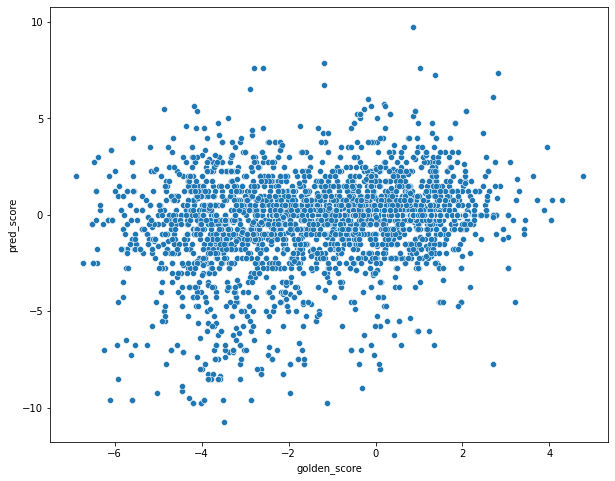

spearman: 0.18379957136642436
pearson: 0.20595842573458137


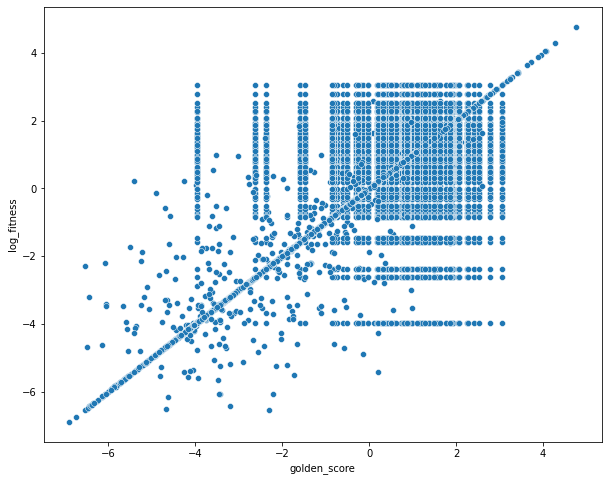

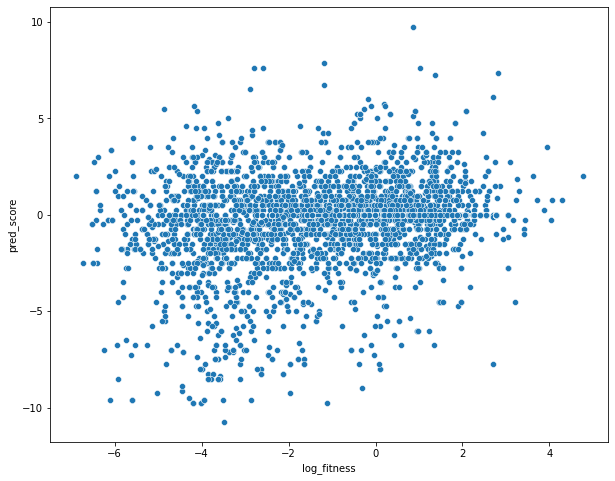

spearman: 0.09881327494345878
pearson: 0.20707974215433592


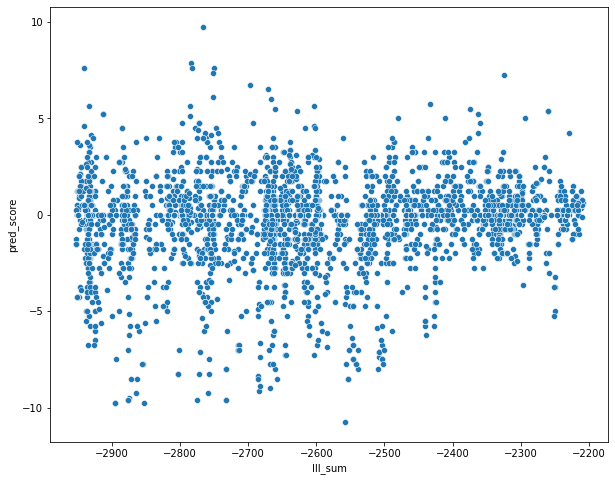

spearman: 0.03722634806532218
pearson: 0.05189726423920102


In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(merged_pred_df, y= "pred_score", x="golden_score")
plt.show()
# Spearman correlation
sr = spearman(pred_df["pred_score"], pred_df["golden_score"], )
print(f"spearman: {sr}")
pr = pred_df["pred_score"].corr(pred_df["golden_score"], method="pearson")
print(f"pearson: {pr}")

plt.figure(figsize=(10, 8))
sns.scatterplot(merged_pred_df, y= "log_fitness", x="golden_score")
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(merged_pred_df, y= "pred_score", x="log_fitness")
plt.show()

# Spearman correlation
sr = spearman(merged_pred_df["pred_score"], merged_pred_df["log_fitness"], )
print(f"spearman: {sr}")
pr = merged_pred_df["pred_score"].corr(merged_pred_df["golden_score"], method="pearson")
print(f"pearson: {pr}")



plt.figure(figsize=(10, 8))
sns.scatterplot(merged_pred_df, y= "pred_score", x="lll_sum")
plt.show()
# Spearman correlation
sr = spearman(merged_pred_df["pred_score"], merged_pred_df["lll_sum"], )
print(f"spearman: {sr}")
pr = merged_pred_df["pred_score"].corr(merged_pred_df["lll_sum"], method="pearson")
print(f"pearson: {pr}")

